In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras


In [212]:
df = pd.read_csv("data/customer_churn.csv")

In [213]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [215]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [216]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [217]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [218]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2825,7610-TVOPG,Male,0,No,No,15,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,26.35,378.6,No
2844,2265-CYWIV,Female,1,Yes,No,4,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.60,347.65,Yes
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No


In [219]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [220]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [221]:
df.groupby("gender")['MonthlyCharges'].sum()

gender
Female    227432.4
Male      228684.2
Name: MonthlyCharges, dtype: float64

In [222]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [223]:
# Since in this case the customer ID will not play a role so we will drop it

df.drop(["customerID"],axis=1, inplace=True)

In [224]:
# As we can see that the customer id column is now dropped

df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [225]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [226]:
# As we can see that monthly charges are in float which is good but the total charges is in objet which is a problem so we need to
# fix it by changing it into float

df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [227]:
# Now as we can see that the Totalcharges column is changed from string to float successfully

df["TotalCharges"].dtypes

dtype('float64')

In [228]:
df.groupby("gender")['TotalCharges'].sum()

gender
Female    7952354.2
Male      8103814.5
Name: TotalCharges, dtype: float64

In [229]:
df["TotalCharges"].isnull().sum()

np.int64(11)

In [230]:
# But there is a problem there might be certain blank values which are converted into float as well

myrows = df[df["TotalCharges"].isnull()]

In [231]:
myrows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [232]:
df["TotalCharges"].isnull().sum()

np.int64(11)

In [233]:
# Create a new dataframe and exclude the rows where the totalcharges == " "(basically dropping na values)

df1 = df.dropna(subset=["TotalCharges"])

In [234]:
print("Original shape",df.shape)
print("New shape",df1.shape)

Original shape (7043, 20)
New shape (7032, 20)


In [235]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

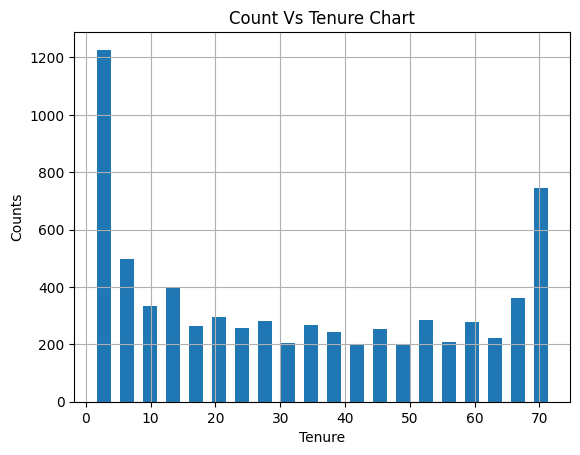

In [236]:
# Now since our data is all cleaned lets visualize the data a little bit

plt.hist(df1["tenure"], bins=20, rwidth=0.6)
plt.grid(True)
plt.xlabel("Tenure")
plt.ylabel("Counts")
plt.title("Count Vs Tenure Chart")
plt.show()

In [237]:
churn_no = df1[df1["Churn"]=="No"].tenure
churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [238]:
churn_yes = df1[df1["Churn"]=="Yes"].tenure
churn_yes

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

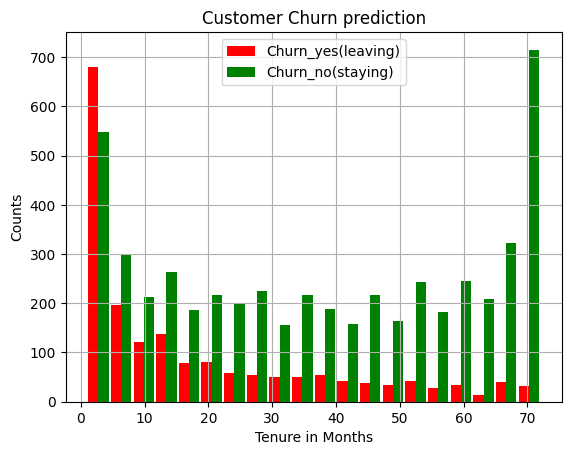

In [239]:
plt.hist([churn_yes,churn_no],bins=20, rwidth=0.9, label=["Churn_yes(leaving)","Churn_no(staying)"],color=["Red","Green"])
# plt.hist(churn_no, bins=20, rwidth=0.6, label="Churn no")

plt.grid(True)
plt.xlabel("Tenure in Months")
plt.ylabel("Counts")
plt.legend()
plt.title("Customer Churn prediction")
plt.show()

In [240]:
# As we can see from the chart that people who are with the company for 70 months will stay and very little will leave
# where as the new customers leave the company pretty soon 

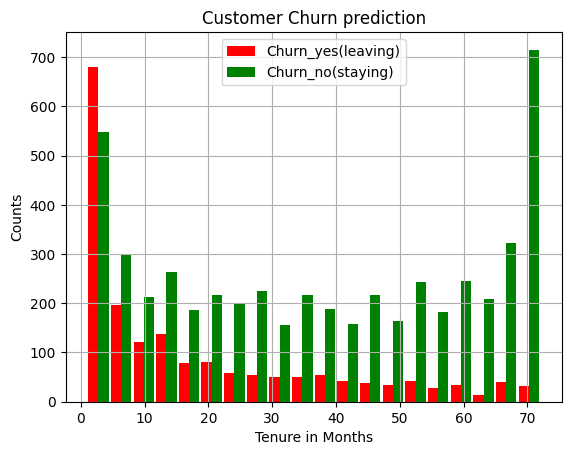

In [241]:
plt.hist([churn_yes,churn_no],bins=20, rwidth=0.9, label=["Churn_yes(leaving)","Churn_no(staying)"],color=["Red","Green"])
# plt.hist(churn_no, bins=20, rwidth=0.6, label="Churn no")

plt.grid(True)
plt.xlabel("Tenure in Months")
plt.ylabel("Counts")
plt.legend()
plt.title("Customer Churn prediction")
plt.show()

In [242]:
churn_yes_mc = df1[df1["Churn"]=="Yes"].MonthlyCharges
churn_yes_mc

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

In [243]:
churn_no_mc = df1[df1["Churn"]=="No"].MonthlyCharges
churn_no_mc

0        29.85
1        56.95
3        42.30
6        89.10
7        29.75
         ...  
7037     21.15
7038     84.80
7039    103.20
7040     29.60
7042    105.65
Name: MonthlyCharges, Length: 5163, dtype: float64

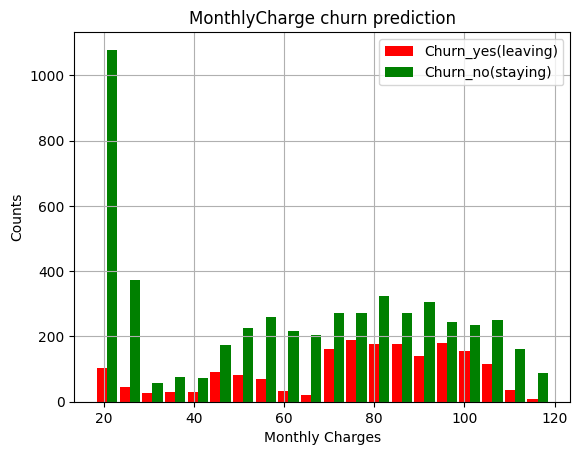

In [244]:
plt.hist([churn_yes_mc,churn_no_mc],bins=20, rwidth=0.9, label=["Churn_yes(leaving)","Churn_no(staying)"],color=["Red","Green"])

plt.grid(True)
plt.xlabel("Monthly Charges")
plt.ylabel("Counts")
plt.legend()
plt.title("MonthlyCharge churn prediction")
plt.show()

In [245]:
# Now lets find out what columns have object values in them (i.e non numeric value)

def find_obj_cols():
    for cols in df1:
        if df1[cols].dtypes == object:
            print(cols,"=",df1[cols].unique())
        
find_obj_cols()

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


In [246]:
# Now as we see that there are many columns where they have "No internet service" and "no" typically that means the same
# so we will replace the No internet service with no
# And in pandas dataframe we have a replace function that replaces a particular value for all instance

In [247]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)
print("Sucess")

Sucess


C:\Users\kumaraka\AppData\Local\Temp\ipykernel_18580\2297427170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace=True)
C:\Users\kumaraka\AppData\Local\Temp\ipykernel_18580\2297427170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace=True)


In [248]:
find_obj_cols()

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes']
OnlineBackup = ['Yes' 'No']
DeviceProtection = ['No' 'Yes']
TechSupport = ['No' 'Yes']
StreamingTV = ['No' 'Yes']
StreamingMovies = ['No' 'Yes']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


In [249]:
# Now lets replace yes and no with 0 or 1 since ML models cannot understand stings

cols_with_yes_no = ["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
                    "StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for cols in cols_with_yes_no:
    df1[cols].replace({"Yes":1,"No":0}, inplace=True)

C:\Users\kumaraka\AppData\Local\Temp\ipykernel_18580\2271668359.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[cols].replace({"Yes":1,"No":0}, inplace=True)
C:\Users\kumaraka\AppData\Local\Temp\ipykernel_18580\2271668359.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[cols].replace(

In [250]:
for cols in df1:
    if df1[cols].dtypes!="object":
        print(f'{cols} = {df1[cols].unique()}')

SeniorCitizen = [0 1]
Partner = [1 0]
Dependents = [0 1]
tenure = [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService = [0 1]
MultipleLines = [0 1]
OnlineSecurity = [0 1]
OnlineBackup = [1 0]
DeviceProtection = [0 1]
TechSupport = [0 1]
StreamingTV = [0 1]
StreamingMovies = [0 1]
PaperlessBilling = [1 0]
MonthlyCharges = [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges = [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn = [0 1]


In [251]:
# As we can see now that everything yes or no is now changed into 0 or 1

In [252]:
df1["gender"].replace({"Female":0,"Male":1}, inplace=True)

C:\Users\kumaraka\AppData\Local\Temp\ipykernel_18580\3506347045.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["gender"].replace({"Female":0,"Male":1}, inplace=True)
C:\Users\kumaraka\AppData\Local\Temp\ipykernel_18580\3506347045.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["gend

In [253]:
# As we can see that the male and female values are changed into 0 and 1
df1.gender.unique()

array([0, 1])

In [254]:
# Now lets one hot encode the certain text columns which have more than 2 values and save it into a new dataframe

df2 = pd.get_dummies(data=df1, columns=["InternetService","Contract","PaymentMethod"])
df2.sample(5)



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6921,1,0,0,0,54,1,1,0,1,0,...,False,True,False,True,False,False,True,False,False,False
2331,0,0,1,0,25,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
6588,0,0,1,1,23,1,1,0,0,0,...,False,False,True,False,False,True,False,False,False,True
4323,0,0,0,0,32,1,1,0,0,0,...,False,True,False,False,True,False,False,False,True,False
838,1,0,0,0,36,1,0,1,0,1,...,True,False,False,True,False,False,False,True,False,False


In [255]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [256]:
# Now we are only left with columns that have numeric values to lets scale those columns coz DL models work best with values
# which are in between 0-1

cols_to_scale = ["TotalCharges","MonthlyCharges","tenure"]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [257]:
df2[cols_to_scale].sample(5)

,TotalCharges,MonthlyCharges,tenure
6480,0.080695,0.350249,0.169014
5986,0.093342,0.605970,0.140845
1858,0.164124,0.546766,0.253521
6526,0.582835,0.819403,0.676056
665,0.025306,0.562189,0.028169


In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X = df2.drop("Churn", axis=1)
y = df2["Churn"]

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [261]:
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)



Shape of X_train (5625, 26)
Shape of X_test (1407, 26)
Shape of y_train (5625,)
Shape of y_test (1407,)


In [262]:
# Now lets import tensorflow libraries
import tensorflow as tf
from tensorflow import keras

In [263]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

C:\Users\kumaraka\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [264]:
model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [268]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8212 - loss: 0.3851 
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8183 - loss: 0.3829 
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.3816 
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8229 - loss: 0.3820 
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8228 - loss: 0.3813 
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8238 - loss: 0.3790 
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.3790 
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.3773 
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8247 - loss: 0.3784 
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.3765 
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.3760 
Epoch 12/100
176/176 ━━━━━━━━━

In [269]:
# Now lets evaluate the model

model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7520 - loss: 0.5309   


[0.530945897102356, 0.7519544959068298]

In [270]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[7.9848632e-02],
       [7.4499696e-01],
       [4.7436255e-04],
       [8.1581074e-01],
       [3.1808111e-01]], dtype=float32)

In [313]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [316]:
type(yp)

numpy.ndarray

In [320]:
# Lets now convert the yp into 1D array and see the values in either 0 or 1

def convert_yp(x):
    ans = []
    for i in x:
        if i<0.5:
            ans.append(0)
        elif i>=0.5:
            ans.append(1)
    return ans
        

y_pred = convert_yp(yp)

In [325]:
type(y_pred)

list

In [326]:
y_pred[:5]

[0, 1, 0, 1, 0]

In [322]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       999
           1       0.57      0.56      0.57       408

    accuracy                           0.75      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.75      0.75      0.75      1407



Text(95.72222222222221, 0.5, 'Truth')

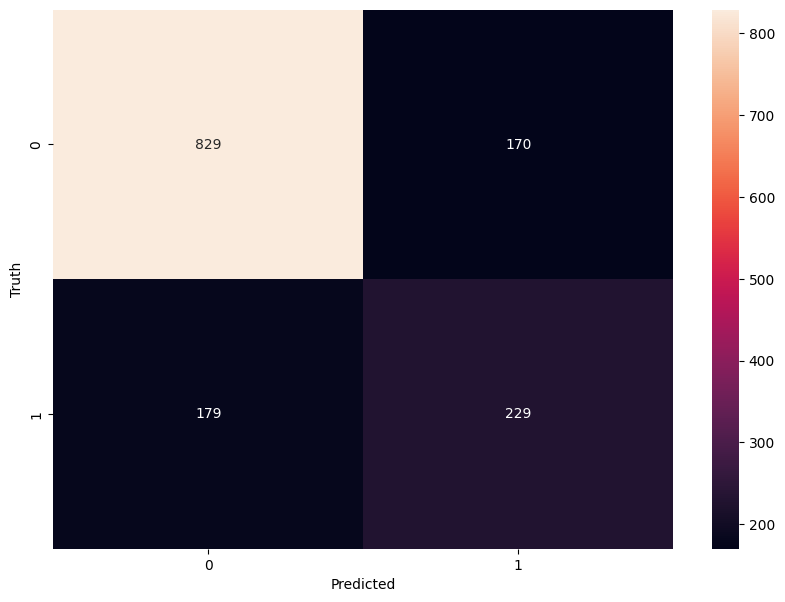

In [327]:

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [328]:
y_test.shape

(1407,)

In [329]:
# Accuracy
round((862+229)/(862+229+137+179),2)

0.78

In [330]:
# Precision for 0 class. i.e. Precision for customers who did not churn
round(862/(862+179),2)

0.83

In [331]:
# Precision for 1 class. i.e. Precision for customers who actually churned
round(229/(229+137),2)

0.63

In [332]:
# Recall for 0 class
round(862/(862+137),2)

0.86

In [333]:
# Recall for 1 class
round(229/(229+179),2)

0.56